# Titanic Analysis

TITANIC was a huge ship that sank in the early hours of April 15, 1912. About 2240 passengers were traveling on Titanic, but only 800 passengers survived which make it one of the deadliest commercial peacetime maritime disasters in modern history.

What are some possible reasons helped these passengers survived? Why not others? 

In [1]:
import csv
from datetime import datetime
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
with open('titanic-data.csv', 'r') as f:
    reader = csv.reader(f)

In [3]:
sample = pd.read_csv('titanic-data.csv')
sample.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


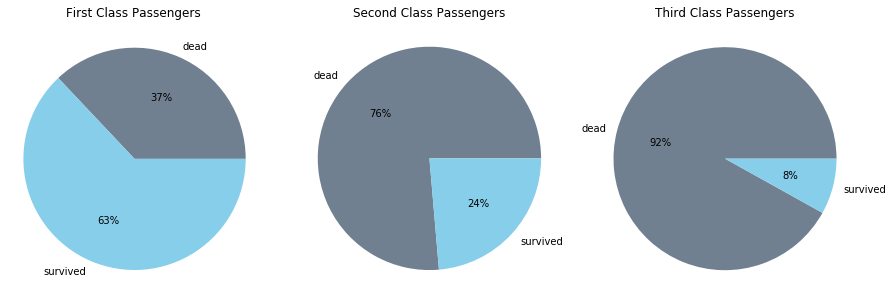

In [4]:

first_class = sample[sample.Pclass==1]
first_all = first_class.Pclass.sum()
first_survived = first_class[first_class.Survived==1].Survived.sum()
first_dead = first_all - first_survived
labels = 'dead','survived'
slices = first_dead , first_survived
colors = ['slategrey','skyblue']
plt.subplot(131)
plt.gcf().set_size_inches(15,5)
plt.pie(slices, labels=labels, colors=colors, autopct='%1.0f%%')
plt.title('First Class Passengers')
plt.axis('equal')

second_class = sample[sample.Pclass==2]
second_all = second_class.Pclass.sum()
second_survived = second_class[second_class.Survived==1].Survived.sum()
second_dead = second_all - second_survived
labels = 'dead','survived'
slices = second_dead , second_survived
colors = ['slategrey','skyblue']
plt.subplot(132)
plt.pie(slices, labels=labels, colors=colors, autopct='%1.0f%%')
plt.title('Second Class Passengers')
plt.axis('equal')


third_class = sample[sample.Pclass==3]
third_all = third_class.Pclass.sum()
third_survived = third_class[third_class.Survived==1].Survived.sum()
third_dead = third_all - third_survived
labels = 'dead','survived'
slices = third_dead , third_survived
colors = ['slategrey','skyblue']
plt.subplot(133)
plt.pie(slices, labels=labels, colors=colors, autopct='%1.0f%%')
plt.title('Third Class Passengers')
plt.axis('equal')

plt.show()


These pie charts make it clear that there is a correlation between the class passengers were traveling on and the chance of survival. 63% of first class passengers survived whereas on the third class only 8% of the passengers survived!


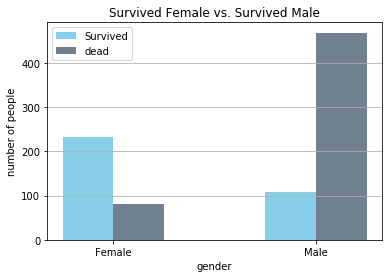

In [5]:
female = sample[sample.Sex=='female']
female_all = len(female.axes[0])
female_survived = female[female.Survived==1].Survived.sum()
female_dead = female_all - female_survived

male = sample[sample.Sex=='male']
male_all = len(male.axes[0])
male_survived = male[male.Survived==1].Survived.sum()
male_dead = male_all - male_survived

bar_width = 0.25
num_bins = 2
bar1 = [female_survived, male_survived]
bar2 = [female_dead, male_dead]
indices = np.arange(len(bar1))

plt.bar(indices, bar1, width = bar_width, color='skyblue', label = 'Survived')
plt.bar(indices+bar_width, bar2, bar_width, color='slategrey', label= 'dead')
plt.xticks(indices+bar_width*0.5 , ('Female', 'Male'))
plt.legend()
plt.grid(axis='y')
plt.title('Survived Female vs. Survived Male')
plt.xlabel('gender')
plt.ylabel('number of passengers')
plt.show()

There is a noticable difference between the number of survived male and female as well! Approximately half of female passengers survived; however, not even quarter of male passengers survived.


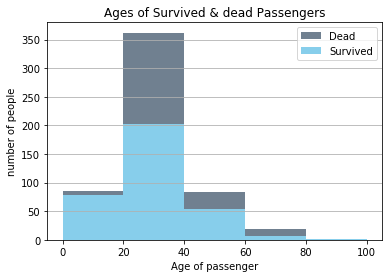

In [6]:
mean = sample['Age'].mean()
clean_sample_age = sample.fillna({'Age': mean})
survived_passengers = clean_sample_age[clean_sample_age.Survived==1]
dead_passengers = clean_sample_age[clean_sample_age.Survived==0]
bins = [0, 20, 40, 60, 80, 100]
indices1 =[survived_passengers.Age]
indices2 =[dead_passengers.Age]
plt.hist(indices2, bins, histtype='bar', stacked=True, rwidth=1, color= 'slategrey', label = 'Dead')
plt.hist(indices1, bins, histtype='bar', stacked=True, rwidth=1,color= 'skyblue', label = 'Survived')
plt.title('Ages of Survived & dead Passengers')
plt.xlabel('Age of passenger')
plt.ylabel('number of passengers')
plt.legend()
plt.grid(axis='y')
plt.show()



The above histogram represents the number of dead and survived passengers depending on thier ages. Although most passengers were from 20-40 years old, they have the highest percentage of death.

# conclusion
In conclusion, although there was a correlation between chance of survival and ticket class, there were many other factors that might affect passenger's chance of survival such as gender and age. However, since this is a sample of the overall data and does not have information about crew, we are not sure if this sample is really representative or not! This is a limitation though it is probably representative.  